# Tansorflow/keras : Analyse de données textuelles

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
#Importer le dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\aerok\anaconda3\envs\DataScience\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\aerok\anaconda3\envs\DataScience\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [3]:
# afficher les dimensions du dataset
print("dimensions de train_data : ",train_data.shape)
print("dimensions de train_labels : ",train_labels.shape)

dimensions de train_data :  (25000,)
dimensions de train_labels :  (25000,)


In [4]:
#importer le dictionnaire association {mot:chiffre}
word_index = imdb.get_word_index()

In [5]:
#inverser les clefs et valeurs du dictionnaire word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
#Decoder le message du train_data[0] en associant les chiffre au mots du dictionnaire reverse_word_index
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# resumé du model définit
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000100   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,010,301
Trainable params: 1,010,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 3s 94ms/step - loss: 0.5826 - accuracy: 0.6851 - val_loss: 0.3414 - val_accuracy: 0.8641
Epoch 2/15
30/30 [==============================] - 1s 40ms/step - loss: 0.2536 - accuracy: 0.9091 - val_loss: 0.3040 - val_accuracy: 0.8785
Epoch 3/15
30/30 [==============================] - 1s 42ms/step - loss: 0.1742 - accuracy: 0.9381 - val_loss: 0.3105 - val_accuracy: 0.8800
Epoch 4/15
30/30 [==============================] - 1s 42ms/step - loss: 0.1313 - accuracy: 0.9516 - val_loss: 0.3113 - val_accuracy: 0.8830
Epoch 5/15
30/30 [==============================] - 1s 44ms/step - loss: 0.0789 - accuracy: 0.9764 - val_loss: 0.3740 - val_accuracy: 0.8729
Epoch 6/15
30/30 [==============================] - 1s 41ms/step - loss: 0.0636 - accuracy: 0.9818 - val_loss: 0.3661 - val_accuracy: 0.8846
Epoch 7/15
30/30 [==============================] - 1s 40ms/step - loss: 0.0240 - accuracy: 0.9956 - val_loss: 0.3776 - val_accuracy: 0.8838
Epoch 8/15
30

In [14]:
#Evaluation du model
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9068 - accuracy: 0.8597


In [15]:
#Affichage de du loss et accuracy
print("Loss = ",test_loss)
print("Accuracy = ",test_acc)

Loss =  0.9067634344100952
Accuracy =  0.8596799969673157


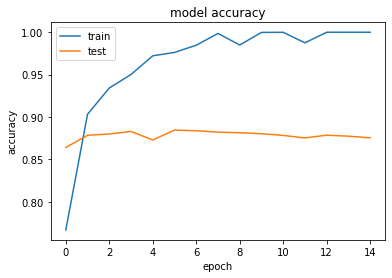

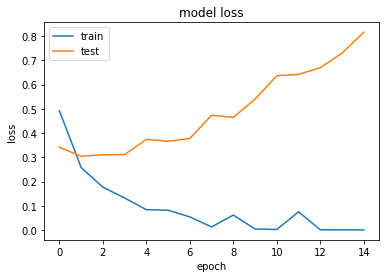

In [16]:
#Entrainnement du reseau de neurone avec affichage du loos et accuracy pour le train & test dataset (methode 3)

# list all data in history
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()